In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls machine-learning-ex1/ex1

computeCost.m	    ex1_multi.m		    normalEqn.m       warmUpExercise.m
computeCostMulti.m  featureNormalize.m	    octave-workspace  x.ps
ex1data1.txt	    gradientDescent.m	    plotData.m	      X.ps
ex1data2.txt	    gradientDescentMulti.m  submit.m
ex1.m		    lib			    token.mat


In [3]:
df = pd.read_csv('machine-learning-ex1/ex1/ex1data2.txt', header=None)
df.columns = ['square_footage', 'num_bedrooms', 'price']
X, y = df[['square_footage', 'num_bedrooms']], df['price']
m = X.shape[0] # number of examples
X.insert(0, 'intercept', np.ones(m))
n = X.shape[1] # number of features

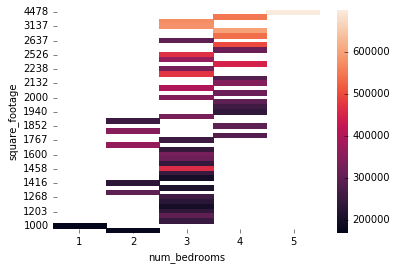

In [4]:
pivot = df.pivot('square_footage', 'num_bedrooms', 'price')
pivot.sort_index(inplace=True, ascending=False)
_ = sns.heatmap(pivot)

In [5]:
def predict(X, theta):
    return X.dot(theta)
                 
def compute_cost(X, y, theta):
    m = X.shape[0]
    squares_of_differences = (predict(X, theta) - y) ** 2
    J = 1/(2*m) * sum(squares_of_differences)
    return J

def compute_gradient(X, y, theta):
    # the aggregate slope of the cost function across all observations
    m = X.shape[0]
    return (1/m) * (X.dot(theta) - y).T.dot(X)

def gradient_descent(X, y, theta, alpha, num_iters):
    """Runs gradient descent algorithm for given input matrix and target vectors.

    Args:
        X (matrix): The m (number of examples) x n (number of features) input matrix.
        y (vector): The target vector.
        alpha (str): The learning rate.
        num_iters (str): How many times to run gradient descent.

    Returns:
        (np.array, np.array): The parameters theta and the history of the cost function.

    """
    J_history = np.zeros(num_iters)
    m = X.shape[0]
        
    for iteration in range(num_iters):
        theta = theta - alpha * compute_gradient(X, y, theta)

        # Save the cost J in every iteration for visualization  
        J_history[iteration]= compute_cost(X, y, theta)
        
    return (theta, J_history)

In [6]:
def normalize_features(X):
    # avoid division by zero
    df_no_intercept = X.drop('intercept', axis=1)
    normalized = (df_no_intercept - df_no_intercept.mean())/df_no_intercept.std()
    
    # re-insert the intercept "feature"
    normalized.insert(0, 'intercept', X['intercept'])
    return normalized

(2043280050.602827, 2043280050.602927)

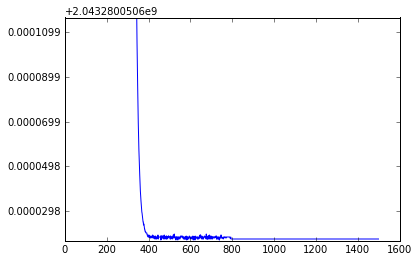

In [7]:
alpha = 0.1
num_iters = 1500
theta = np.zeros(n)
X_normalized = normalize_features(X)
m = X_normalized.shape[0]

result, history = gradient_descent(X_normalized, y, theta, alpha, num_iters)
plt.plot(history)
# TODO determine when change is very small
plt.ylim([history.min(),history.min() + 0.0001])

In [8]:
def normal_equation(X, y):
    X_transpose = X.T
    return np.linalg.pinv(X_transpose.dot(X)) \
        .dot(X_transpose) \
        .dot(y)

In [9]:
result_normal = normal_equation(X, y)

In [10]:
result

intercept         340412.659574
square_footage    110631.050279
num_bedrooms       -6649.474271
dtype: float64

# Validation
Predict house price using
* parameters obtained using gradient descent algorithm
* parameters obtained using normal equation

Predictions using both methods should be equal.

In [11]:
intercept_feature = 1
square_footage = 1650
num_bedrooms = 3

test_input = np.array([intercept_feature, square_footage, num_bedrooms])

normalized_input = np.array([
    intercept_feature, 
    (square_footage - X['square_footage'].mean())/X['square_footage'].std(),
    (num_bedrooms - X['num_bedrooms'].mean())/X['num_bedrooms'].std()]) # intercept, square_footage, num_bedrooms

In [12]:
precision = 3
pred_gradient_descent = result_normal.dot(test_input)
pred_normal_equation = result.dot(normalized_input)

assert(
    pred_gradient_descent.round(precision) == pred_normal_equation.round(precision)
)

pred_gradient_descent, pred_normal_equation

(293081.4643349721, 293081.46433489595)